In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [20]:
data = pd.read_csv('../dataset/labeled_data.csv')
data

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,Injection_Time,...,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
0,5f8928bb9c0189cc666ef19b,2020-10-16 04:57:47,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.59,...,24.799999,27.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5f8928de9c0189cc666ef20b,2020-10-16 04:58:48,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.60,...,24.799999,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5f8928df9c0189cc666ef213,2020-10-16 04:58:48,2020-10-16 오전 12:00:00,23,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,None,9.60,...,24.799999,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5f8928f39c0189cc666ef25e,2020-10-16 04:59:48,2020-10-16 오전 12:00:00,23,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,None,9.59,...,25.000000,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5f8928f59c0189cc666ef265,2020-10-16 04:59:48,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.59,...,25.000000,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,5fa112859c0189cc66dabe34,2020-11-03 08:17:36,2020-11-03 오전 12:00:00,6,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,None,9.60,...,21.000000,22.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7992,5fa112869c0189cc66dabe42,2020-11-03 08:18:37,2020-11-03 오전 12:00:00,7,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.60,...,21.000000,22.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7993,5fa112879c0189cc66dabe50,2020-11-03 08:18:37,2020-11-03 오전 12:00:00,6,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,None,9.60,...,21.000000,22.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7994,5fa112bb9c0189cc66dac22a,2020-11-03 08:19:35,2020-11-03 오전 12:00:00,6,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,None,9.60,...,21.000000,22.299999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# raw data 확인결과 

# 시간정보컬럼('_id', 'TimeStamp', 'PART_FACT_PLAN_DATE') 
# 제품정보컬럼('PART_FACT_SERIAL','PART_NAME', 'EQUIP_CD', 'EQUIP_NAME') 
# 공정조건컬럼('Injection_Time' 부터 끝까지)
# 그 외('PassOrFail', 'Reason') 로 구분됨

# 여러 제품과 여러 사출기에서 생산된 정보가 혼합되어 있음
# 제품이 다르면 공정 조건이 아예 다를 수 있어 혼합된 데이터로는 예측이 어려움
# 사출기가 다르면 마찬가지로 공정조건이 덜라질 수 있음
# 공정조건에 따라 불량여부를 예측하려면 제품과 사출기에 대해 테이블 분리가 필요함
# 제품정보(part_name-제품이름, Equip_cd-사출기호기, Equip_name-사출기모델명)에 대해 분석이 먼저 필요하고, 공정조건(시간,압력,온도 등등)에 대해서는 결측값이나 이상치 확인이 필요함

data.columns

Index(['_id', 'TimeStamp', 'PART_FACT_PLAN_DATE', 'PART_FACT_SERIAL',
       'PART_NAME', 'EQUIP_CD', 'EQUIP_NAME', 'PassOrFail', 'Reason',
       'Injection_Time', 'Filling_Time', 'Plasticizing_Time', 'Cycle_Time',
       'Clamp_Close_Time', 'Cushion_Position', 'Switch_Over_Position',
       'Plasticizing_Position', 'Clamp_Open_Position', 'Max_Injection_Speed',
       'Max_Screw_RPM', 'Average_Screw_RPM', 'Max_Injection_Pressure',
       'Max_Switch_Over_Pressure', 'Max_Back_Pressure',
       'Average_Back_Pressure', 'Barrel_Temperature_1', 'Barrel_Temperature_2',
       'Barrel_Temperature_3', 'Barrel_Temperature_4', 'Barrel_Temperature_5',
       'Barrel_Temperature_6', 'Barrel_Temperature_7', 'Hopper_Temperature',
       'Mold_Temperature_1', 'Mold_Temperature_2', 'Mold_Temperature_3',
       'Mold_Temperature_4', 'Mold_Temperature_5', 'Mold_Temperature_6',
       'Mold_Temperature_7', 'Mold_Temperature_8', 'Mold_Temperature_9',
       'Mold_Temperature_10', 'Mold_Temperature_11', 

In [ ]:
#1.시간정보컬럼 분석 

# 시간이 제품 불량에 영향을 줄 것 같지 않아 모두 불필요한 정보
# 필요한 정보 : 없음

In [4]:
#2. 제품정보컬럼 분석

#2-1. 'PART_NAME' : 제품이름 
# CN7 / RG3 에 대해 데이터가 많고 JX1, SP2는 정보가 별로 없음, RH, LH는 방향에 대한 정보인 것 같음
# --> 데이터가 많은 CN7 / RG3 만 분석 수행하고 제품이 다르면 공정 조건도 다를 것이기 때문에 CN7 / RG3로 나누어 분석
# 필요한 정보 : 'PART_NAME' 중에서 CN7, RG3
data['PART_NAME'].value_counts()

CN7 W/S SIDE MLD'G RH        3371
CN7 W/S SIDE MLD'G LH        3365
RG3 MOLD'G W/SHLD, RH         628
RG3 MOLD'G W/SHLD, LH         628
SP2 CVR ROOF RACK CTR, RH       2
JX1 W/S SIDE MLD'G RH           2
Name: PART_NAME, dtype: int64

In [22]:
#2-2. 'EQUIP_CD', 'EQUIP_NAME' : 사출기 정보 

# 확인결과 동일한 정보임(하나만사용) --> 사출기마다 상태가 다를 수 있어 데이터가 충분한 650톤-우진2호기에 대해서 분석 수행 
# 필요한 정보 : 'EQUIP_NAME' 중에서 650톤-우진2호기 

print(data['EQUIP_CD'].value_counts())
print()
print(data['EQUIP_NAME'].value_counts())

S14    7992
S01       2
S12       2
Name: EQUIP_CD, dtype: int64

650톤-우진2호기    7992
650톤-우진          2
1800TON-우진       2
Name: EQUIP_NAME, dtype: int64


In [24]:
#2-3. 'PART_FACT_SERIAL' : 생산품목에 대한 코드로 특이점을 찾지 못했고, 제품 불량여부에는 영향을 주지 않는 정보라 제외
# 필요한 정보 : 없음

data['PART_FACT_SERIAL'].value_counts()

10    1787
9     1781
7      927
6      926
13     418
14     418
22     388
21     388
11     252
12     250
24     188
23     187
18      41
17      41
2        2
3        1
4        1
Name: PART_FACT_SERIAL, dtype: int64

In [7]:
#3.공정조건컬럼 분석 

#rawdata 확인결과 값이 0으로 되어 있는 컬럼이 많았음, 해당 컬럼 제거하고 정보가 있는 컬럼만 사용

Index(['_id', 'TimeStamp', 'PART_FACT_PLAN_DATE', 'PART_FACT_SERIAL',
       'PART_NAME', 'EQUIP_CD', 'EQUIP_NAME', 'PassOrFail', 'Reason',
       'Injection_Time', 'Filling_Time', 'Plasticizing_Time', 'Cycle_Time',
       'Clamp_Close_Time', 'Cushion_Position', 'Switch_Over_Position',
       'Plasticizing_Position', 'Clamp_Open_Position', 'Max_Injection_Speed',
       'Max_Screw_RPM', 'Average_Screw_RPM', 'Max_Injection_Pressure',
       'Max_Switch_Over_Pressure', 'Max_Back_Pressure',
       'Average_Back_Pressure', 'Barrel_Temperature_1', 'Barrel_Temperature_2',
       'Barrel_Temperature_3', 'Barrel_Temperature_4', 'Barrel_Temperature_5',
       'Barrel_Temperature_6', 'Barrel_Temperature_7', 'Hopper_Temperature',
       'Mold_Temperature_1', 'Mold_Temperature_2', 'Mold_Temperature_3',
       'Mold_Temperature_4', 'Mold_Temperature_5', 'Mold_Temperature_6',
       'Mold_Temperature_7', 'Mold_Temperature_8', 'Mold_Temperature_9',
       'Mold_Temperature_10', 'Mold_Temperature_11', 

In [34]:
#mean, 75% 값을 확인해 0인 컬럼은 제외
# data.iloc[:,9:19].describe() 
# 필요한 컬럼 : 'Injection_Time', 'Filling_Time', 'Plasticizing_Time', 'Cycle_Time, 'Clamp_Close_Time', 'Cushion_Position', 'Plasticizing_Position, 'Clamp_Open_Position', 'Max_Injection_Speed'
# data.iloc[:,19:29].describe() 
# 필요한 컬럼 : 'Max_Screw_RPM', 'Average_Screw_RPM', 'Max_Injection_Pressure', 'Max_Switch_Over_Pressure', 'Max_Back_Pressure', 'Average_Back_Pressure', 'Barrel_Temperature_1', 'Barrel_Temperature_2', 'Barrel_Temperature_3', 'Barrel_Temperature_4'
data.iloc[:,29:].describe() 
# 필요한 컬럼 : 'Barrel_Temperature_5', 'Barrel_Temperature_6', 'Mold_Temperature_3', 'Mold_Temperature_4'

,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_1,Mold_Temperature_2,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.0,7996.0,7996.000000,7996.000000,7996.0,7996.0,7996.0,7996.0,7996.0,7996.0,7996.0,7996.0
mean,256.507403,230.763295,0.009105,66.458742,0.0,0.0,22.145260,23.522574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,3.837589,1.945383,0.575642,2.577198,0.0,0.0,1.177468,1.356586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,235.300003,220.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,254.899994,229.899994,0.000000,65.400002,0.0,0.0,21.400000,22.700001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,255.000000,230.100006,0.000000,66.699997,0.0,0.0,22.000000,23.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,255.399994,230.199997,0.000000,67.599998,0.0,0.0,22.900000,24.200001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,270.399994,264.299988,36.400002,70.599998,0.0,0.0,25.299999,27.799999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
# 필요한 컬럼만 가져와서 재구성
col_use = ['PART_NAME','EQUIP_NAME','Injection_Time', 'Filling_Time', 'Plasticizing_Time', 'Cycle_Time', 'Clamp_Close_Time', 'Cushion_Position', 
           'Plasticizing_Position', 'Clamp_Open_Position', 'Max_Injection_Speed','Max_Screw_RPM', 'Average_Screw_RPM', 'Max_Injection_Pressure', 
           'Max_Switch_Over_Pressure', 'Max_Back_Pressure', 'Average_Back_Pressure', 'Barrel_Temperature_1', 'Barrel_Temperature_2', 'Barrel_Temperature_3', 
           'Barrel_Temperature_4', 'Barrel_Temperature_5', 'Barrel_Temperature_6', 'Mold_Temperature_3', 'Mold_Temperature_4', 'PassOrFail'] # 마지막 컬럼에 종속변수(불량여부 라벨링)
data_filt = data.loc[:,col_use]
data_filt

,PART_NAME,EQUIP_NAME,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Mold_Temperature_3,Mold_Temperature_4,PassOrFail
0,CN7 W/S SIDE MLD'G RH,650톤-우진2호기,9.59,4.47,16.920000,59.520000,7.13,653.409973,68.849998,647.98999,...,59.299999,276.500000,274.700012,274.799988,269.200012,255.000000,229.699997,24.799999,27.500000,Y
1,CN7 W/S SIDE MLD'G RH,650톤-우진2호기,9.60,4.48,16.910000,59.580002,7.13,653.409973,68.839996,647.98999,...,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,24.799999,27.600000,Y
2,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,9.60,4.48,16.910000,59.580002,7.13,653.409973,68.839996,647.98999,...,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,24.799999,27.600000,Y
3,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,9.59,4.48,16.910000,59.560001,7.13,653.419983,68.839996,647.98999,...,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,25.000000,27.600000,Y
4,CN7 W/S SIDE MLD'G RH,650톤-우진2호기,9.59,4.48,16.910000,59.560001,7.13,653.419983,68.839996,647.98999,...,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,25.000000,27.600000,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,9.60,4.48,16.620001,59.560001,7.11,653.429993,68.330002,647.98999,...,59.900002,276.500000,274.899994,275.100006,269.500000,255.600006,229.600006,21.000000,22.400000,Y
7992,CN7 W/S SIDE MLD'G RH,650톤-우진2호기,9.60,4.48,16.650000,59.560001,7.11,653.429993,68.349998,647.98999,...,59.900002,275.799988,275.299988,275.500000,270.700012,254.899994,230.000000,21.000000,22.400000,Y
7993,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,9.60,4.48,16.650000,59.560001,7.11,653.429993,68.349998,647.98999,...,59.900002,275.799988,275.299988,275.500000,270.700012,254.899994,230.000000,21.000000,22.400000,Y
7994,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,9.60,4.48,16.629999,59.580002,7.11,653.429993,68.330002,647.98999,...,59.900002,276.100006,275.799988,275.000000,271.299988,255.100006,230.199997,21.000000,22.299999,Y


In [90]:
# 1. 사출기 : 650톤-우진2호기 외에는 데이터가 적어 제거하고 컬럼 제거(테이블 자체가 650톤-우진2호기에 대한 내용)
data_filt = data_filt[data_filt.EQUIP_NAME=='650톤-우진2호기']
data_filt = data_filt.drop(['EQUIP_NAME'], axis=1)
data_filt


,PART_NAME,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Mold_Temperature_3,Mold_Temperature_4,PassOrFail
0,CN7 W/S SIDE MLD'G RH,9.59,4.47,16.920000,59.520000,7.13,653.409973,68.849998,647.98999,55.400002,...,59.299999,276.500000,274.700012,274.799988,269.200012,255.000000,229.699997,24.799999,27.500000,Y
1,CN7 W/S SIDE MLD'G RH,9.60,4.48,16.910000,59.580002,7.13,653.409973,68.839996,647.98999,55.299999,...,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,24.799999,27.600000,Y
2,CN7 W/S SIDE MLD'G LH,9.60,4.48,16.910000,59.580002,7.13,653.409973,68.839996,647.98999,55.299999,...,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,24.799999,27.600000,Y
3,CN7 W/S SIDE MLD'G LH,9.59,4.48,16.910000,59.560001,7.13,653.419983,68.839996,647.98999,55.299999,...,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,25.000000,27.600000,Y
4,CN7 W/S SIDE MLD'G RH,9.59,4.48,16.910000,59.560001,7.13,653.419983,68.839996,647.98999,55.299999,...,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,25.000000,27.600000,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,CN7 W/S SIDE MLD'G LH,9.60,4.48,16.620001,59.560001,7.11,653.429993,68.330002,647.98999,54.900002,...,59.900002,276.500000,274.899994,275.100006,269.500000,255.600006,229.600006,21.000000,22.400000,Y
7992,CN7 W/S SIDE MLD'G RH,9.60,4.48,16.650000,59.560001,7.11,653.429993,68.349998,647.98999,55.000000,...,59.900002,275.799988,275.299988,275.500000,270.700012,254.899994,230.000000,21.000000,22.400000,Y
7993,CN7 W/S SIDE MLD'G LH,9.60,4.48,16.650000,59.560001,7.11,653.429993,68.349998,647.98999,55.000000,...,59.900002,275.799988,275.299988,275.500000,270.700012,254.899994,230.000000,21.000000,22.400000,Y
7994,CN7 W/S SIDE MLD'G LH,9.60,4.48,16.629999,59.580002,7.11,653.429993,68.330002,647.98999,54.900002,...,59.900002,276.100006,275.799988,275.000000,271.299988,255.100006,230.199997,21.000000,22.299999,Y


In [93]:
# 2. 제품이름 : CN7 / RG3 외에는 데이터가 적어 제거하고 CN7, RG3 에 대한 데이터프레임 각각 생성, 이후 PART_NAME 컬럼 제거

#CN7에 대한 데이터프레임 생성
data_CN7_rh = data_filt[data_filt.PART_NAME=='CN7 W/S SIDE MLD\'G RH']
data_CN7_lh = data_filt[data_filt.PART_NAME=='CN7 W/S SIDE MLD\'G LH']
data_CN7 = pd.concat([data_CN7_rh,data_CN7_lh], axis = 0)
data_CN7['PassOrFail'] = data_CN7['PassOrFail'].replace('Y', 0).replace('N', 1) # Pass : 0, Fail : 1 숫자로 변환
data_CN7 = data_CN7.drop(['PART_NAME'], axis=1)
data_CN7

,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Mold_Temperature_3,Mold_Temperature_4,PassOrFail
0,9.59,4.47,16.920000,59.520000,7.13,653.409973,68.849998,647.98999,55.400002,30.700001,...,59.299999,276.500000,274.700012,274.799988,269.200012,255.000000,229.699997,24.799999,27.500000,0
1,9.60,4.48,16.910000,59.580002,7.13,653.409973,68.839996,647.98999,55.299999,30.799999,...,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,24.799999,27.600000,0
4,9.59,4.48,16.910000,59.560001,7.13,653.419983,68.839996,647.98999,55.299999,31.000000,...,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,25.000000,27.600000,0
5,9.58,4.46,16.900000,59.580002,7.13,653.409973,68.839996,647.98999,55.599998,30.900000,...,59.400002,276.299988,275.299988,275.200012,271.399994,255.000000,230.000000,25.000000,27.600000,0
7,9.58,4.46,16.920000,59.560001,7.13,653.409973,68.849998,647.98999,55.500000,30.600000,...,59.299999,275.799988,275.399994,275.000000,271.299988,255.000000,230.000000,25.000000,27.600000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7987,9.58,4.46,16.670000,59.520000,7.11,653.429993,68.339996,647.98999,55.200001,30.600000,...,59.700001,275.799988,275.500000,275.500000,269.500000,255.000000,230.199997,21.000000,22.400000,0
7989,9.60,4.49,16.650000,59.540001,7.11,653.429993,68.320000,647.98999,54.900002,30.799999,...,59.799999,276.100006,275.899994,274.899994,269.700012,254.600006,229.600006,21.000000,22.400000,0
7991,9.60,4.48,16.620001,59.560001,7.11,653.429993,68.330002,647.98999,54.900002,30.700001,...,59.900002,276.500000,274.899994,275.100006,269.500000,255.600006,229.600006,21.000000,22.400000,0
7993,9.60,4.48,16.650000,59.560001,7.11,653.429993,68.349998,647.98999,55.000000,30.700001,...,59.900002,275.799988,275.299988,275.500000,270.700012,254.899994,230.000000,21.000000,22.400000,0


In [94]:
#RG3에 대한 데이터프레임 생성
data_RG3_rh = data_filt[data_filt.PART_NAME=='RG3 MOLD\'G W/SHLD, RH']
data_RG3_lh = data_filt[data_filt.PART_NAME=='RG3 MOLD\'G W/SHLD, LH']
data_RG3 = pd.concat([data_RG3_rh,data_RG3_lh], axis = 0)
data_RG3['PassOrFail'] = data_RG3['PassOrFail'].replace('Y', 0).replace('N', 1) # Pass : 0, Fail : 1 숫자로 변환
data_RG3 = data_RG3.drop(['PART_NAME'], axis=1)
data_RG3

,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Mold_Temperature_3,Mold_Temperature_4,PassOrFail
1212,1.06,0.93,13.01,61.779999,6.81,654.289978,53.560001,4.63,128.500000,30.900000,...,60.299999,286.000000,285.000000,285.000000,275.399994,265.100006,234.899994,21.600000,22.500000,0
1214,1.06,0.93,12.99,61.779999,6.81,654.280029,53.580002,4.63,128.500000,30.900000,...,60.500000,286.200012,285.799988,285.000000,275.600006,265.600006,234.800003,21.500000,22.500000,0
1216,1.06,0.93,12.95,61.759998,6.81,654.270020,53.560001,4.63,128.399994,30.900000,...,60.200001,286.500000,285.100006,285.000000,276.000000,265.100006,234.699997,21.500000,22.500000,0
1218,1.06,0.93,13.02,61.779999,6.81,654.270020,53.560001,4.63,128.399994,30.799999,...,60.400002,285.299988,285.500000,284.500000,276.000000,264.799988,234.800003,21.600000,22.500000,0
1220,1.06,0.93,12.97,61.779999,6.81,654.280029,53.560001,4.63,128.399994,30.900000,...,60.299999,286.299988,285.899994,285.600006,275.399994,265.000000,235.199997,21.600000,22.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5224,1.07,0.94,13.07,61.759998,6.79,654.260010,53.610001,4.63,127.599998,30.799999,...,61.900002,285.600006,285.100006,285.000000,275.799988,264.899994,235.100006,22.400000,24.200001,0
5225,1.07,0.94,13.09,61.740002,6.79,654.250000,53.619999,4.63,127.500000,30.799999,...,61.599998,286.200012,284.799988,285.100006,275.500000,265.000000,235.000000,22.600000,24.400000,0
5228,1.07,0.94,13.12,61.779999,6.79,654.250000,53.610001,4.63,127.500000,31.100000,...,61.500000,285.899994,284.899994,285.700012,274.899994,265.000000,234.899994,22.500000,24.299999,0
5229,1.07,0.94,12.96,61.779999,6.79,654.270020,53.669998,4.63,128.000000,30.900000,...,60.599998,285.899994,284.899994,285.500000,274.399994,264.899994,235.100006,22.299999,23.700001,0


<AxesSubplot:>

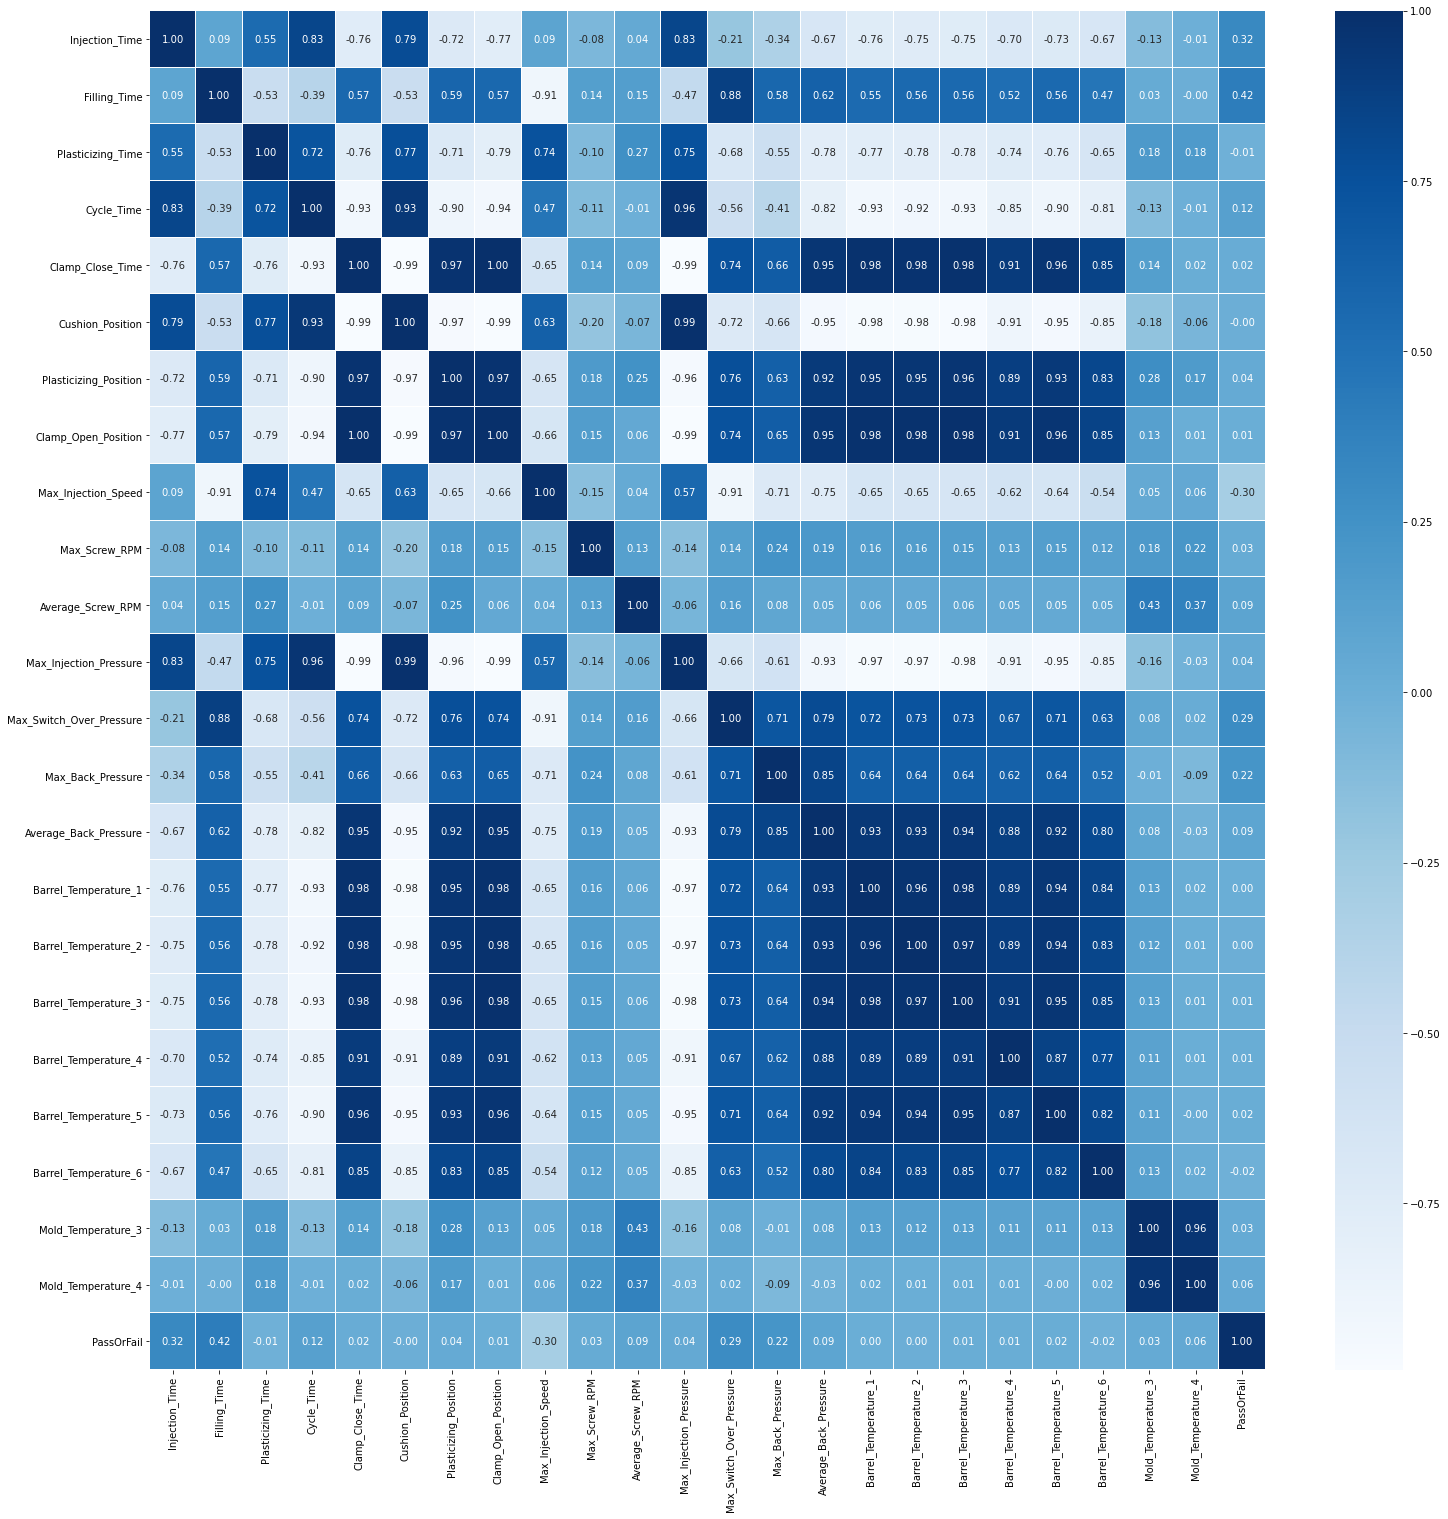

In [118]:
#CN7에 대한 피어슨 상관계수 상위 5개: Filling_Time, Injection_Time, Max_Injection_Speed, Max_Switch_Over_Pressure, Max_Back_Pressure
corr_CN7 = data_CN7.corr()
plt.subplots(figsize=(25,25))
sns.heatmap(data = corr_CN7,linewidths=0.1,annot=True, fmt = '.2f', cmap='Blues')


<AxesSubplot:>

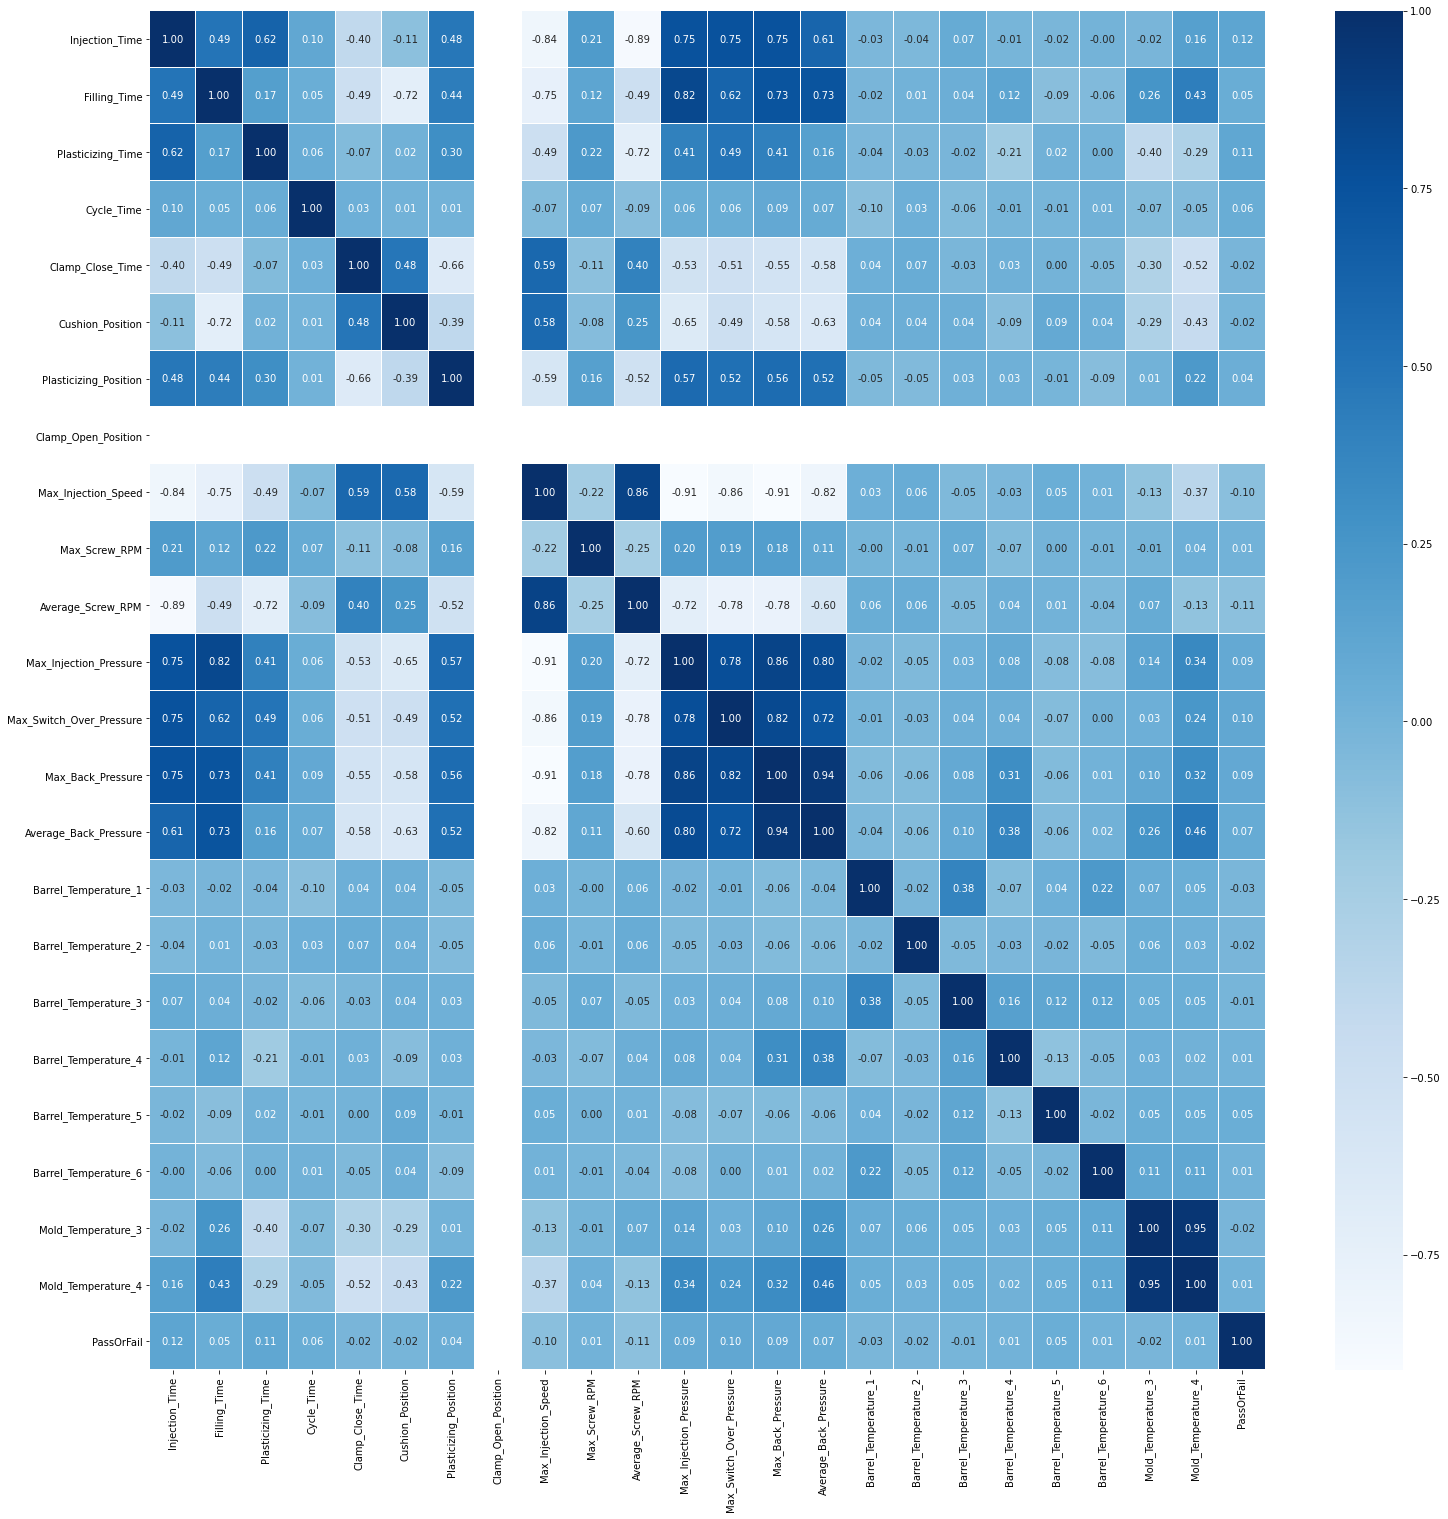

In [120]:
#RG3에 대한 피어슨 상관계수 상위 5개: Injection_Time, Average_Screw_RPM, Plasticizing_Time, Max_Injection_Speed, Max_Switch_Over_Pressure

corr_RG3 = data_RG3.corr()
plt.subplots(figsize=(25,25))
sns.heatmap(data = corr_RG3,linewidths=0.1,annot=True, fmt = '.2f', cmap='Blues')

In [114]:
# 데이터 파일 저장

data_CN7.to_pickle('data_CN7')
data_RG3.to_pickle('data_RG3')